# <span style='color:#9F000F'> Face Mask Detection</span>

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import numpy as np
import pandas as pd 
import imageio
import matplotlib.image as mpimg
from keras.preprocessing import image
import plotly.express as px
import plotly.figure_factory as ff

# <span style='color:#9F000F'> Initializing path of images</span>

In [9]:
curr_dir="D:/kshitija"
main_dir = os.path.join(curr_dir,"New Masks Dataset")
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
validation_dir = os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir,'Mask')
train_non_mask_dir = os.path.join(train_dir,'Non Mask')
allmodels=[]

In [10]:
os.listdir(main_dir)

['Test', 'Train', 'Validation']

In [11]:
train_mask_dir_name = os.listdir(train_mask_dir)
train_non_mask_dir_name = os.listdir(train_non_mask_dir)

print(train_mask_dir_name[:10])
print(train_non_mask_dir_name[:10])

['0003.jpg', '0006.jpg', '0018.jpg', '0019.jpg', '0022.jpg', '0027.jpg', '0029.jpg', '0037.jpg', '0040.jpg', '0042.jpg']
['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg']


In [12]:
traindf=pd.DataFrame({
    "Label":['Mask','No Mask'],
    "Count":[len(train_mask_dir_name),len(train_non_mask_dir_name)]
})
traindf
fig = px.pie(traindf, values='Count', names='Label', title='Count of Images in Train Directory', 
             width=600, height=600, color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(
        font=dict(
            family="Times New Roman, Bold",
            size=26,
            color="RebeccaPurple"
        )
    )
fig.show()

In [13]:
lbldir=os.listdir(train_dir)
lbldir

['Mask', 'Non Mask']

# <span style='color:#9F000F'> Visualizing Images</span>

### <span style='color:#9F000F'>Person with Mask</span>

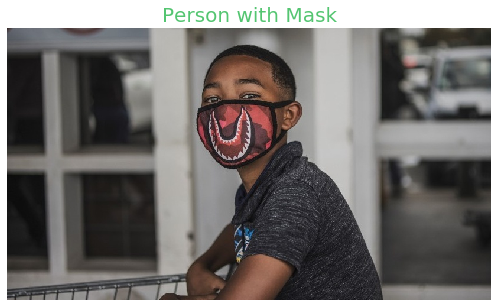

In [14]:
imidx=np.random.randint(100)
primg1=os.path.join(train_dir,lbldir[0],os.listdir(train_dir+"/"+lbldir[0])[imidx])
pic1=imageio.imread(primg1)
plt.figure(figsize=(10,5))
plt.title("Person with Mask",fontsize=20,color="#54C571")
plt.imshow(pic1)
plt.axis('off')
plt.show()

### <span style='color:#9F000F'>Person without Mask</span>

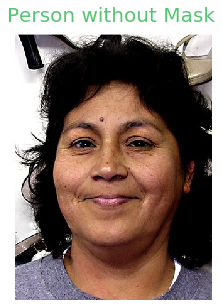

In [15]:
imidx=np.random.randint(100)
primg1=os.path.join(train_dir,lbldir[1],os.listdir(train_dir+"/"+lbldir[1])[imidx])
pic1=imageio.imread(primg1)
plt.figure(figsize=(10,5))
plt.title("Person without Mask",fontsize=20,color="#54C571")
plt.imshow(pic1)
plt.axis('off')
plt.show()

# <span style='color:#9F000F'>Creating Image Generator</span>

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   rotation_range=40,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_images_generator = train_datagen.flow_from_directory(train_dir,
                                                           target_size=(180,180),
                                                           batch_size=32,
                                                           class_mode='binary')

test_images_generator = test_datagen.flow_from_directory(test_dir,
                                                           target_size=(180,180),
                                                           batch_size=32,
                                                           class_mode='binary')

valid_images_generator = validation_datagen.flow_from_directory(validation_dir,
                                                           target_size=(180,180),
                                                           batch_size=32,
                                                           class_mode='binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


## <span style='color:#9F000F'>Detecting labels of Class</span>

In [17]:
train_images_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

## <span style='color:#9F000F'>Detecting Shape of Images</span>

In [18]:
train_images_generator.image_shape

(180, 180, 3)

## <span style='color:#9F000F'>Accuracy and Loss Visualization</span>

In [19]:
def lossviz(hst,lrt,epch):
    plt.figure(figsize=(15,7))
    plt.title("Training And Validation Loss (With Learning Rate {}, Epoch {})".format(lrt,epch),fontsize=20,color="#8C001A")
    plt.plot(hst.history['loss'],"#E41B17")
    plt.plot(hst.history['val_loss'],"#F87217")
    plt.legend(['Training','Validation'])
    plt.xlabel("Epochs",fontsize=16,color="#8C001A")
    plt.ylabel("Loss",fontsize=16,color="#8C001A")
    plt.grid()
    plt.show()

def accviz(hst,lrt,epch):
    plt.figure(figsize=(15,7))
    plt.title("Training And Validation Accuracy (Learning Rate {}, Epoch {})".format(lrt,epch),fontsize=20,color="#8C001A")
    plt.plot(hst.history['accuracy'],"#E41B17")
    plt.plot(hst.history['val_accuracy'],"#F87217")
    plt.legend(['Training','Validation'])
    plt.xlabel("Epochs",fontsize=16,color="#8C001A")
    plt.ylabel("Accuracy",fontsize=16,color="#8C001A")
    plt.grid()
    plt.show()


# <span style='color:#9F000F'>Applying Convolutional Neural Network</span>

In [20]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(180,180,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

W0505 15:13:46.949607 20500 deprecation.py:506] From c:\users\kshitija\appdata\local\programs\python\python36\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 45, 45, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 129600)            0

In [21]:
lrt1=0.001
epch1=10
model.compile(Adam(learning_rate=lrt1),loss='binary_crossentropy',metrics=['accuracy'])
history1 = model.fit(train_images_generator,epochs=epch1,validation_data=valid_images_generator)
history1.history.keys()
allmodels.append(history1)

W0505 15:13:51.851559 20500 deprecation.py:323] From c:\users\kshitija\appdata\local\programs\python\python36\lib\site-packages\tensorflow_core\python\ops\nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
19/19 [==============================] - 17s 915ms/step - loss: 3.5928 - acc: 0.5217 - val_loss: 0.6647 - val_acc: 0.5033
Epoch 2/10
19/19 [==============================] - 16s 847ms/step - loss: 0.6335 - acc: 0.6067 - val_loss: 0.5637 - val_acc: 0.8529
Epoch 3/10
19/19 [==============================] - 16s 854ms/step - loss: 0.4752 - acc: 0.8267 - val_loss: 0.3613 - val_acc: 0.8987
Epoch 4/10
19/19 [==============================] - 16s 857ms/step - loss: 0.3374 - acc: 0.8817 - val_loss: 0.2735 - val_acc: 0.9052
Epoch 5/10
19/19 [==============================] - 17s 869ms/step - loss: 0.3033 - acc: 0.8817 - val_loss: 0.3119 - val_acc: 0.8856
Epoch 6/10
19/19 [==============================] - 16s 867ms/step - loss: 0.2953 - acc: 0.8950 - val_loss: 0.2402 - val_acc: 0.9216
Epoch 7/10
19/19 [==============================] - 16s 859ms/step - loss: 0.2582 - acc: 0.9067 - val_loss: 0.2298 - val_acc: 0.9150
Epoch 8/10
19/19 [==============================] - 17s 870ms/step - 

In [22]:
test_loss , test_acc = model.evaluate(test_images_generator)

print("Test Loss: {} Test Accuracy: {}".format(round(test_loss,2)*100,round(test_acc,2)*100))

4/4 [==============================] - 1s 271ms/step - loss: 0.1862 - acc: 0.9300
Test Loss: 19.0 Test Accuracy: 93.00000071525574


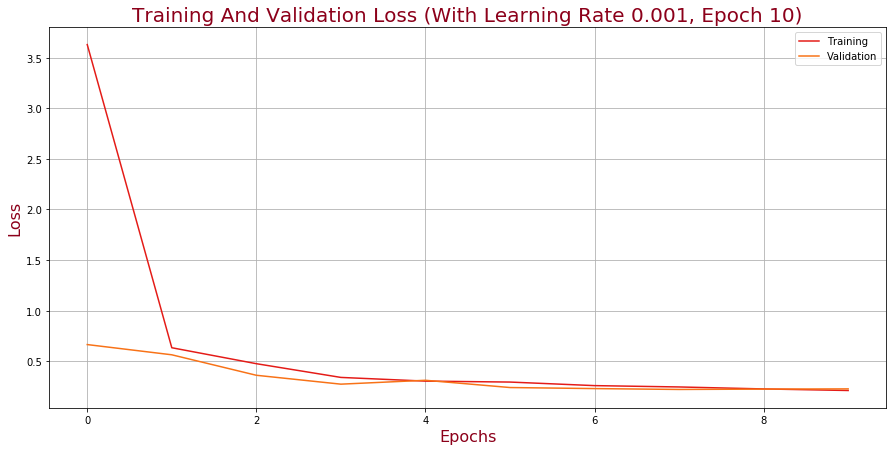

KeyError: 'accuracy'

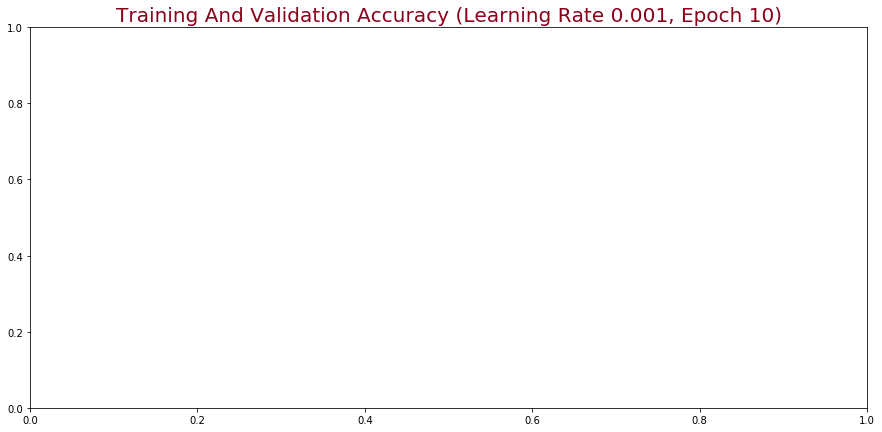

In [23]:
lossviz(history1,lrt1,epch1)
accviz(history1,lrt1,epch1)

In [24]:
lrt2=0.0001
epch2=20
model.compile(Adam(learning_rate=lrt2),loss='binary_crossentropy',metrics=['accuracy'])
history2 = model.fit(train_images_generator,epochs=epch2,validation_data=valid_images_generator)
history2.history.keys()
allmodels.append(history2)

Epoch 1/20
19/19 [==============================] - 18s 967ms/step - loss: 0.1938 - acc: 0.9317 - val_loss: 0.2131 - val_acc: 0.9020
Epoch 2/20
19/19 [==============================] - 17s 873ms/step - loss: 0.1799 - acc: 0.9367 - val_loss: 0.2215 - val_acc: 0.9052
Epoch 3/20
19/19 [==============================] - 17s 879ms/step - loss: 0.1812 - acc: 0.9367 - val_loss: 0.2217 - val_acc: 0.8954
Epoch 4/20
19/19 [==============================] - 17s 880ms/step - loss: 0.1941 - acc: 0.9350 - val_loss: 0.2161 - val_acc: 0.8987
Epoch 5/20
19/19 [==============================] - 17s 900ms/step - loss: 0.1651 - acc: 0.9433 - val_loss: 0.2194 - val_acc: 0.8987
Epoch 6/20
19/19 [==============================] - 17s 883ms/step - loss: 0.1778 - acc: 0.9467 - val_loss: 0.2205 - val_acc: 0.9052
Epoch 7/20
19/19 [==============================] - 17s 888ms/step - loss: 0.1774 - acc: 0.9383 - val_loss: 0.2266 - val_acc: 0.8987
Epoch 8/20
19/19 [==============================] - 17s 899ms/step - 

In [25]:
test_loss , test_acc = model.evaluate(test_images_generator)

print("Test Loss: {} Test Accuracy: {}".format(round(test_loss,2)*100,round(test_acc,2)*100))

4/4 [==============================] - 1s 273ms/step - loss: 0.1414 - acc: 0.9400
Test Loss: 14.000000000000002 Test Accuracy: 93.99999976158142


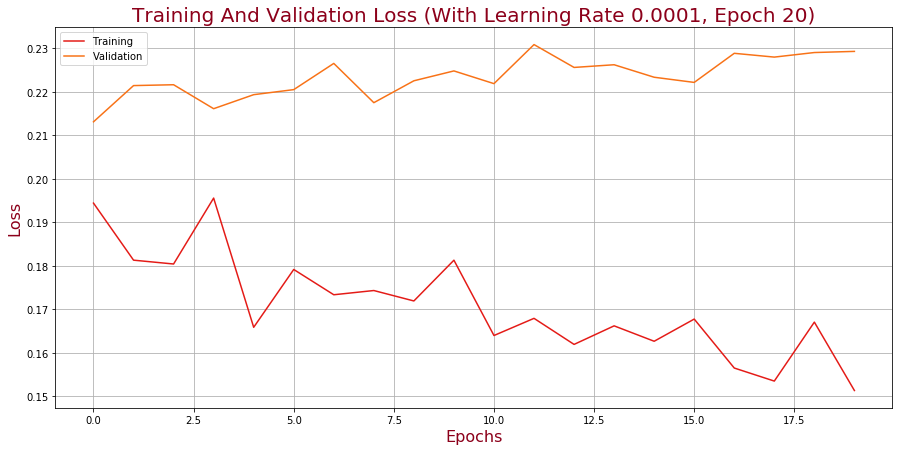

KeyError: 'accuracy'

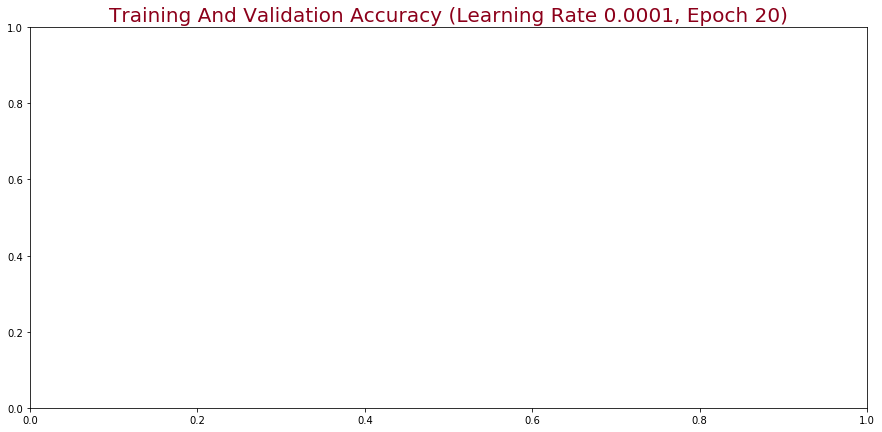

In [26]:
lossviz(history2,lrt2,epch2)
accviz(history2,lrt2,epch2)

In [27]:
lrt3=0.00001
epch3=30
model.compile(Adam(learning_rate=lrt3),loss='binary_crossentropy',metrics=['accuracy'])
history3 = model.fit(train_images_generator,epochs=epch3,validation_data=valid_images_generator)
history3.history.keys()
allmodels.append(history3)

Epoch 1/30
19/19 [==============================] - 19s 1s/step - loss: 0.1587 - acc: 0.9517 - val_loss: 0.2210 - val_acc: 0.9052
Epoch 2/30
19/19 [==============================] - 18s 940ms/step - loss: 0.1514 - acc: 0.9467 - val_loss: 0.2203 - val_acc: 0.9052
Epoch 3/30
19/19 [==============================] - 17s 901ms/step - loss: 0.1611 - acc: 0.9433 - val_loss: 0.2258 - val_acc: 0.9052
Epoch 4/30
19/19 [==============================] - 17s 897ms/step - loss: 0.1430 - acc: 0.9600 - val_loss: 0.2290 - val_acc: 0.9052
Epoch 5/30
19/19 [==============================] - 17s 898ms/step - loss: 0.1406 - acc: 0.9500 - val_loss: 0.2295 - val_acc: 0.9052
Epoch 6/30
19/19 [==============================] - 17s 901ms/step - loss: 0.1378 - acc: 0.9517 - val_loss: 0.2200 - val_acc: 0.9052
Epoch 7/30
19/19 [==============================] - 17s 913ms/step - loss: 0.1443 - acc: 0.9417 - val_loss: 0.2148 - val_acc: 0.9052
Epoch 8/30
19/19 [==============================] - 18s 931ms/step - los

In [28]:
test_loss , test_acc = model.evaluate(test_images_generator)

print("Test Loss: {} Test Accuracy: {}".format(round(test_loss,2)*100,round(test_acc,2)*100))

4/4 [==============================] - 1s 284ms/step - loss: 0.1377 - acc: 0.9400
Test Loss: 14.000000000000002 Test Accuracy: 93.99999976158142


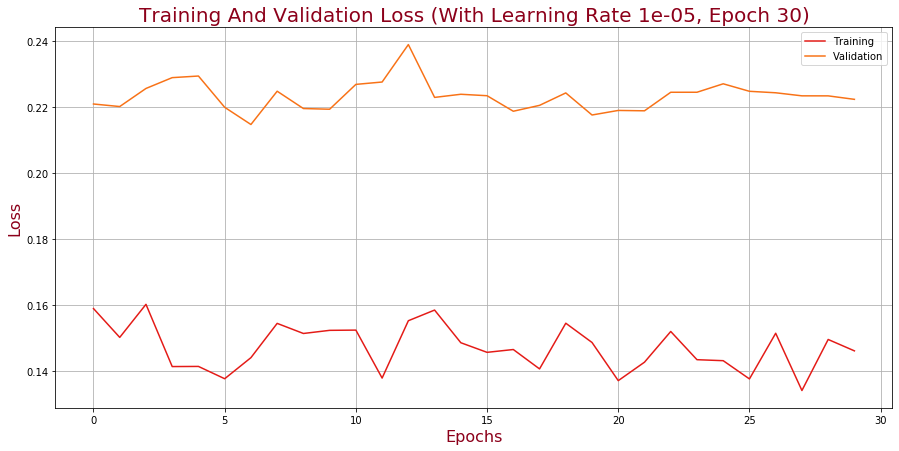

KeyError: 'accuracy'

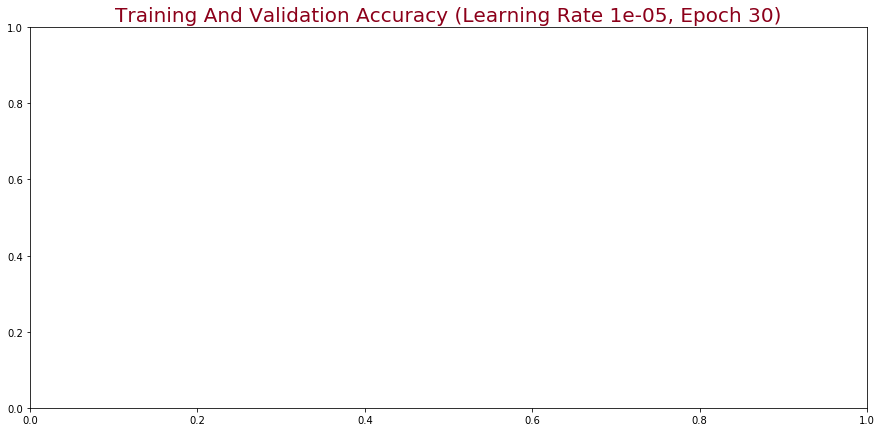

In [29]:
lossviz(history3,lrt3,epch3)
accviz(history3,lrt3,epch3)

**So, the moldel has not been overfitted**

In [30]:
model.save('model_Face_Mask_Detection.h5')

# <span style='color:#9F000F'>Model Testing with images</span>

In [31]:
import matplotlib.image as mpimg
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array

def test_image_mask_nomask(path,cond):
    if cond=='yes':
        im = mpimg.imread(path)
        #print(im)
        plt.imshow(im)

        img = image.load_img(path,target_size=(180,180))
        #img = image.img_to_array(img)
        img = np.expand_dims(img,axis=0)
        prediction = model.predict(img)
        if prediction == 0:
            return "Mask"
        else:
            return "Non Mask"
    else:
        im = mpimg.imread(path)
        img = image.load_img(path,target_size=(180,180))
        img = image.img_to_array(img)
        img = np.expand_dims(img,axis=0)
        prediction = model.predict(img)
        if prediction == 0:
            return "Mask"
        else:
            return "Non Mask"

In [ ]:
test_image_mask_nomask('D:/Datasets/Mask Data/New Masks Dataset/Validation/Mask/1818.jpg','yes')

In [ ]:
test_image_mask_nomask('D:/Datasets/Mask Data/New Masks Dataset/Validation/Non Mask/real_00042.jpg','yes')

# <span style='color:#9F000F'>Model Validation</span>

In [ ]:
vldir=os.path.join(main_dir ,'Validation')
os.listdir(vldir)

In [ ]:
imglink=[]
lbl=[]
for i in os.listdir(vldir):
    crpath=os.path.join(vldir,i)
    for j in os.listdir(crpath):
        imglink.append(crpath+"/"+j)
        lbl.append(i)
valdf=pd.DataFrame({
    "Image":imglink,
    "Label":lbl
})
valdf=valdf.sample(n=len(valdf), random_state=10)
valdf=valdf.reset_index(drop=True)
vldlbl=[]
wrng_val=[]
for i in range(len(valdf)):
        status=test_image_mask_nomask(valdf.iloc[i,0],'no')
        if status!=valdf.iloc[i,1]:
            wrng_val.append(valdf.iloc[i,0])
            '''for i in range(10):
                stt=test_image_mask_nomask(valdf.iloc[i,0],'no')
                if stt==status:
                    vldlbl.append(stt)
                    break'''

        vldlbl.append(status)
valdf['Validation']=vldlbl
ct=pd.crosstab(valdf['Label'],valdf['Validation'])
valacc=sum(np.array(ct).diagonal())/sum(np.array(ct).flatten())
plt.figure(figsize=(7,5))
sns.heatmap(ct,annot=True,fmt='d')
plt.show()
print(*wrng_val,sep="\n")
ct

In [ ]:
tstdir=os.path.join(main_dir ,'test')
os.listdir(tstdir)

In [ ]:
imglink=[]
lbl=[]
for i in os.listdir(tstdir):
    crpath=os.path.join(tstdir,i)
    for j in os.listdir(crpath):
        imglink.append(crpath+"/"+j)
        lbl.append(i)
tstdf=pd.DataFrame({
    "Image":imglink,
    "Label":lbl
})
tstdf=tstdf.sample(n=len(tstdf), random_state=10)
tstdf=tstdf.reset_index(drop=True)
tstlbl=[]
for i in range(len(tstdf)):
        status=test_image_mask_nomask(tstdf.iloc[i,0],'no')
        tstlbl.append(status)
tstdf['Test']=tstlbl
ct1=pd.crosstab(tstdf['Label'],tstdf['Test'])
tstacc=sum(np.array(ct1).diagonal())/sum(np.array(ct1).flatten())
plt.figure(figsize=(7,5))
sns.heatmap(ct1,annot=True,fmt='d')
plt.show()
ct1